In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

Raw Image info: (256, 256, 4)
Raw Image datatype: uint8
0
32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  0


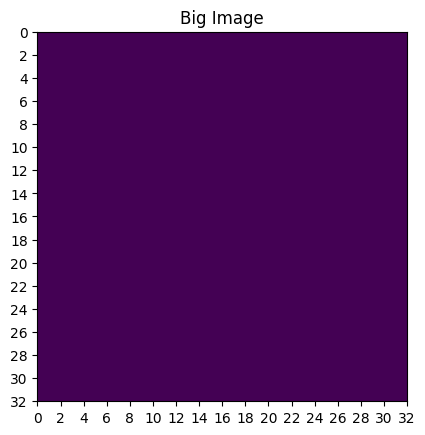

0
32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  1


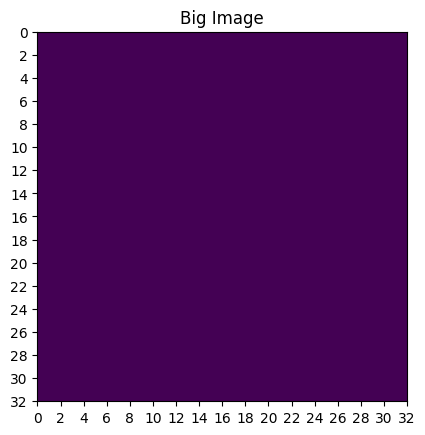

0
32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  2


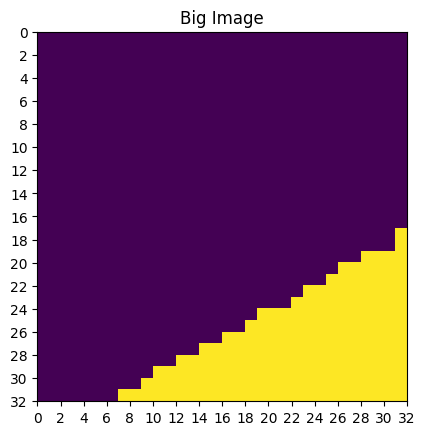

0
32
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         1.         1.         ... 1.         0.97254902 0.83137255]
 [1.         1.         1.         ... 0.86666667 0.70588235 0.61960784]
 [1.         1.         1.         ... 0.70980392 0.76470588 0.8       ]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  3


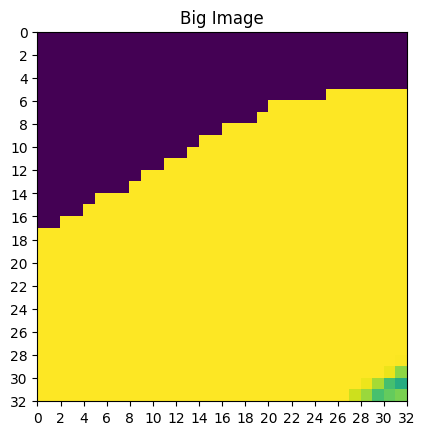

0
32
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.64705882 0.59607843 0.6        ... 0.66666667 0.67058824 0.67058824]
 [0.60392157 0.63137255 0.61176471 ... 0.66666667 0.67058824 0.67058824]
 [0.78823529 0.77254902 0.66666667 ... 0.67058824 0.67058824 0.6745098 ]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  4


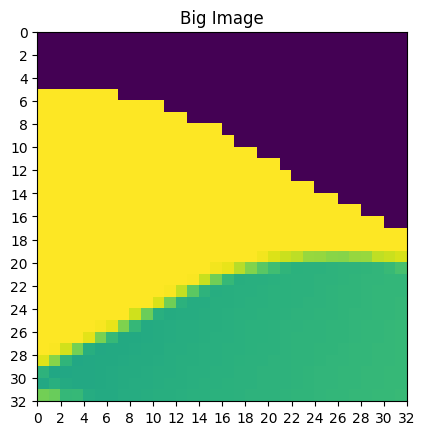

0
32
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.6745098  0.6745098  0.67843137 ... 0.         0.         0.        ]
 [0.6745098  0.67843137 0.67843137 ... 0.         0.         0.        ]
 [0.67843137 0.67843137 0.67843137 ... 0.         0.         0.        ]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  5


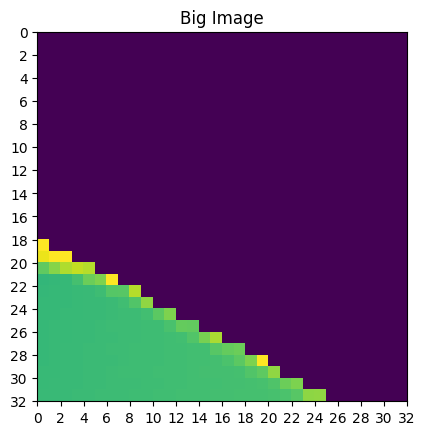

0
32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Image shape (numpy array): (32, 32)
Iteration x: 0, y:  6


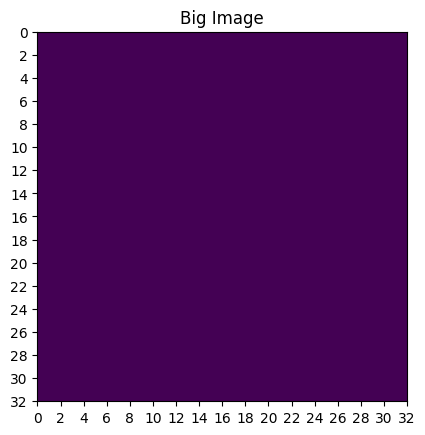

32
64
Traceback (most recent call last):
  Cell In[40], line 27
    image[i].append(image_raw[i][j][0] / 255)
IndexError: list index out of range

Use %tb to get the full traceback.


In [40]:
from PIL import Image
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('Images/mozilla_test.png'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
for x in range(int(image_size / image_crop_size) - 1):
    for y in range(int(image_size / image_crop_size) - 1):
        lx = int(x * image_crop_size)
        ux = int((x + 1) * image_crop_size)
        ly = int(y * image_crop_size)
        uy = int((y + 1) * image_crop_size)
        print(str(lx))
        print(str(ux))
        image = []
        for i in range(lx, ux):
            image.append([])
            for j in range(ly, uy):
                image[i].append(image_raw[i][j][0] / 255)

        image = np.array(image)
        print(str(image))
        print('Image shape (numpy array):', image.shape)
        print('Iteration x: ' + str(x) + ', y: ', str(y))

        plt.title('Big Image')
        plt.xticks(range(0, image.shape[0]+1, 2))
        plt.yticks(range(0, image.shape[1]+1, 2))
        plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
        plt.show()
